# 🚙**Project: Analyzing Vehicle Collision Trends and Predictive Modelling in New York City - PART 2**🚙
---
## **Instructor:**  
- **Dr. Manjari Maheshwari**

## **Contributors:**  
- **Lu Dang Duy Khanh**
- **Truc Anh Nguyen**
- **Bassey Elliot**
- **Papa Kofi Arhin**

## **College & Course:**  
**St. Clair College / DAB322-25F-002 CAPSTONE PROJECT 1 Fall 2025 - 002 - 002**

# <center> **Introduction**  
---
**This project focuses on analyzing and visualizing New York City vehicle collision data to uncover patterns, identify risk factors, and enhance the reader's understanding of traffic safety dynamics within the city..**

Part 1: Data Overview & Exploratory Visualizations
- Examine the distribution of key variables such as crash time, location, and contributing factors.

Part 2: Explore Data Distribution
- Examine how data (numerical / categorical) distributed

Part 3: Incident Analysis & Spatial Visualizations
- Identify high-frequency crash zones and analyze relationships between vehicle types, street conditions, and collision severity.

### NOTE

`Due to the dataset's large volume (2+ million records, 500+ MB), we have split the analysis into 2 parts for readability and interpretability`.

`This segment is dedicated to Exploratory Data Analysis.`

# <Center> Part 2: Exploratory Data Analysis

**Import the necessary libraries**

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Load the dataset**

In [2]:
df = pd.read_csv('df_NYC_cleaned.csv')

#Remove Index
df = df.drop(columns=['Unnamed: 0'])

# Display 5 rows
df.head(5).T

,0,1,2,3,4
CRASH_DATE,2021-09-11,2022-03-26,2023-11-01,2022-06-29,2022-09-21
CRASH_TIME,02:39:00,11:45:00,01:29:00,06:55:00,13:21:00
BOROUGH,NaN,MANHATTAN,BROOKLYN,NaN,BROOKLYN
ZIP_CODE,NaN,NaN,11230.0,NaN,NaN
LATITUDE,NaN,NaN,40.62179,NaN,NaN
LONGITUDE,NaN,NaN,-73.970024,NaN,NaN
LOCATION,NaN,NaN,"(40.62179, -73.970024)",NaN,NaN
ON_STREET_NAME,WHITESTONE EXPRESSWAY,QUEENSBORO BRIDGE UPPER,OCEAN PARKWAY,THROGS NECK BRIDGE,BROOKLYN BRIDGE
CROSS_STREET_NAME,20 AVENUE,NaN,AVENUE K,NaN,NaN
OFF_STREET_NAME,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562799 entries, 0 to 562798
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_DATE                     562799 non-null  object 
 1   CRASH_TIME                     562799 non-null  object 
 2   BOROUGH                        533996 non-null  object 
 3   ZIP_CODE                       372209 non-null  float64
 4   LATITUDE                       518185 non-null  float64
 5   LONGITUDE                      518185 non-null  float64
 6   LOCATION                       518185 non-null  object 
 7   ON_STREET_NAME                 413115 non-null  object 
 8   CROSS_STREET_NAME              268223 non-null  object 
 9   OFF_STREET_NAME                149671 non-null  object 
 10  NUMBER_OF_PERSONS_INJURED      562798 non-null  float64
 11  NUMBER_OF_PERSONS_KILLED       562799 non-null  float64
 12  NUMBER_OF_PEDESTRIANS_INJURED 

## **<Center>  Univariate Analysis**

### **Distribution of Numerical Values**

**Correlation Matrix**

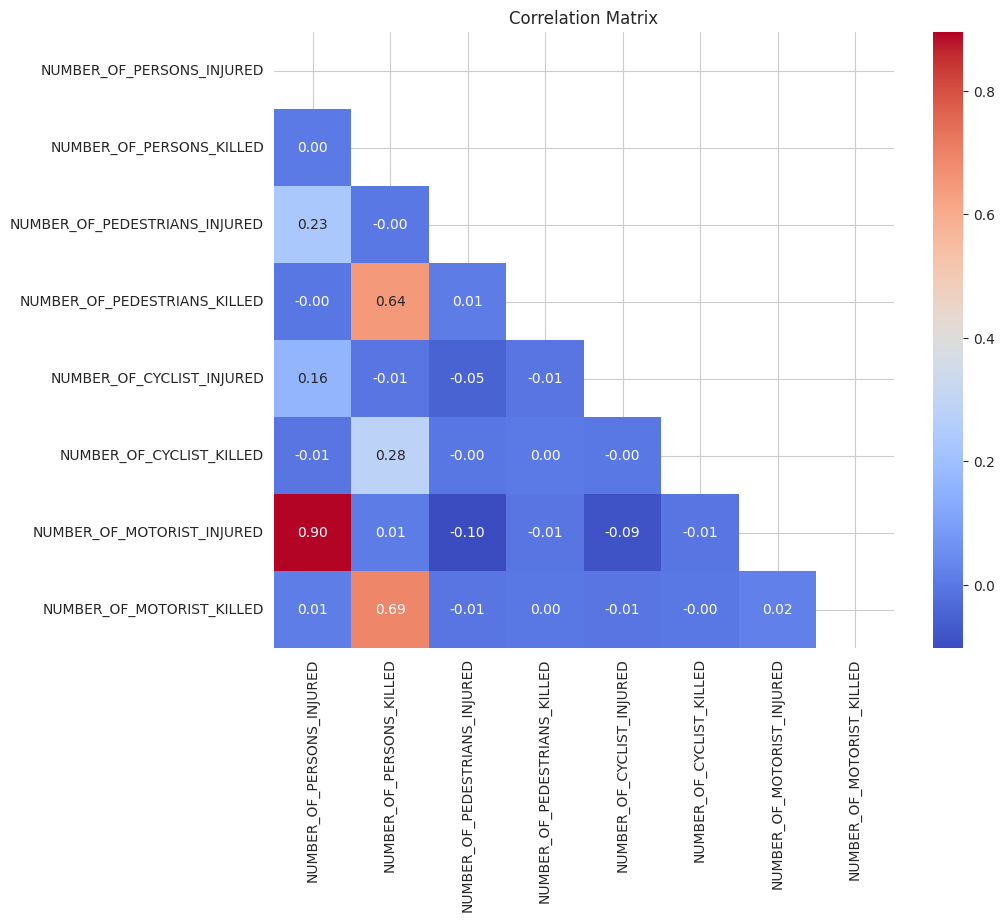

In [4]:
# Select numeric columns, excluding GEO and ID
numeric_cols = df.drop(['ZIP_CODE','LATITUDE', 'LONGITUDE','COLLISION_ID'],axis=1).select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with upper triangle only
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

**Key Observations**

- Injuries are heavily skewed toward motorists (0.90 corr).
- Fatalities split between pedestrians (0.68) and motorists (0.66) — both critical.
- Cyclists have low correlation with total counts

### Histogram Disbribution of Numerical Values

In [5]:
# Convert float count columns to pandas nullable integers for readability
cols = numeric_cols.to_list()

# Fill NA with 0 as Null is considered as zero injured/killed
df[cols] = df[cols].fillna(0).astype('int64')

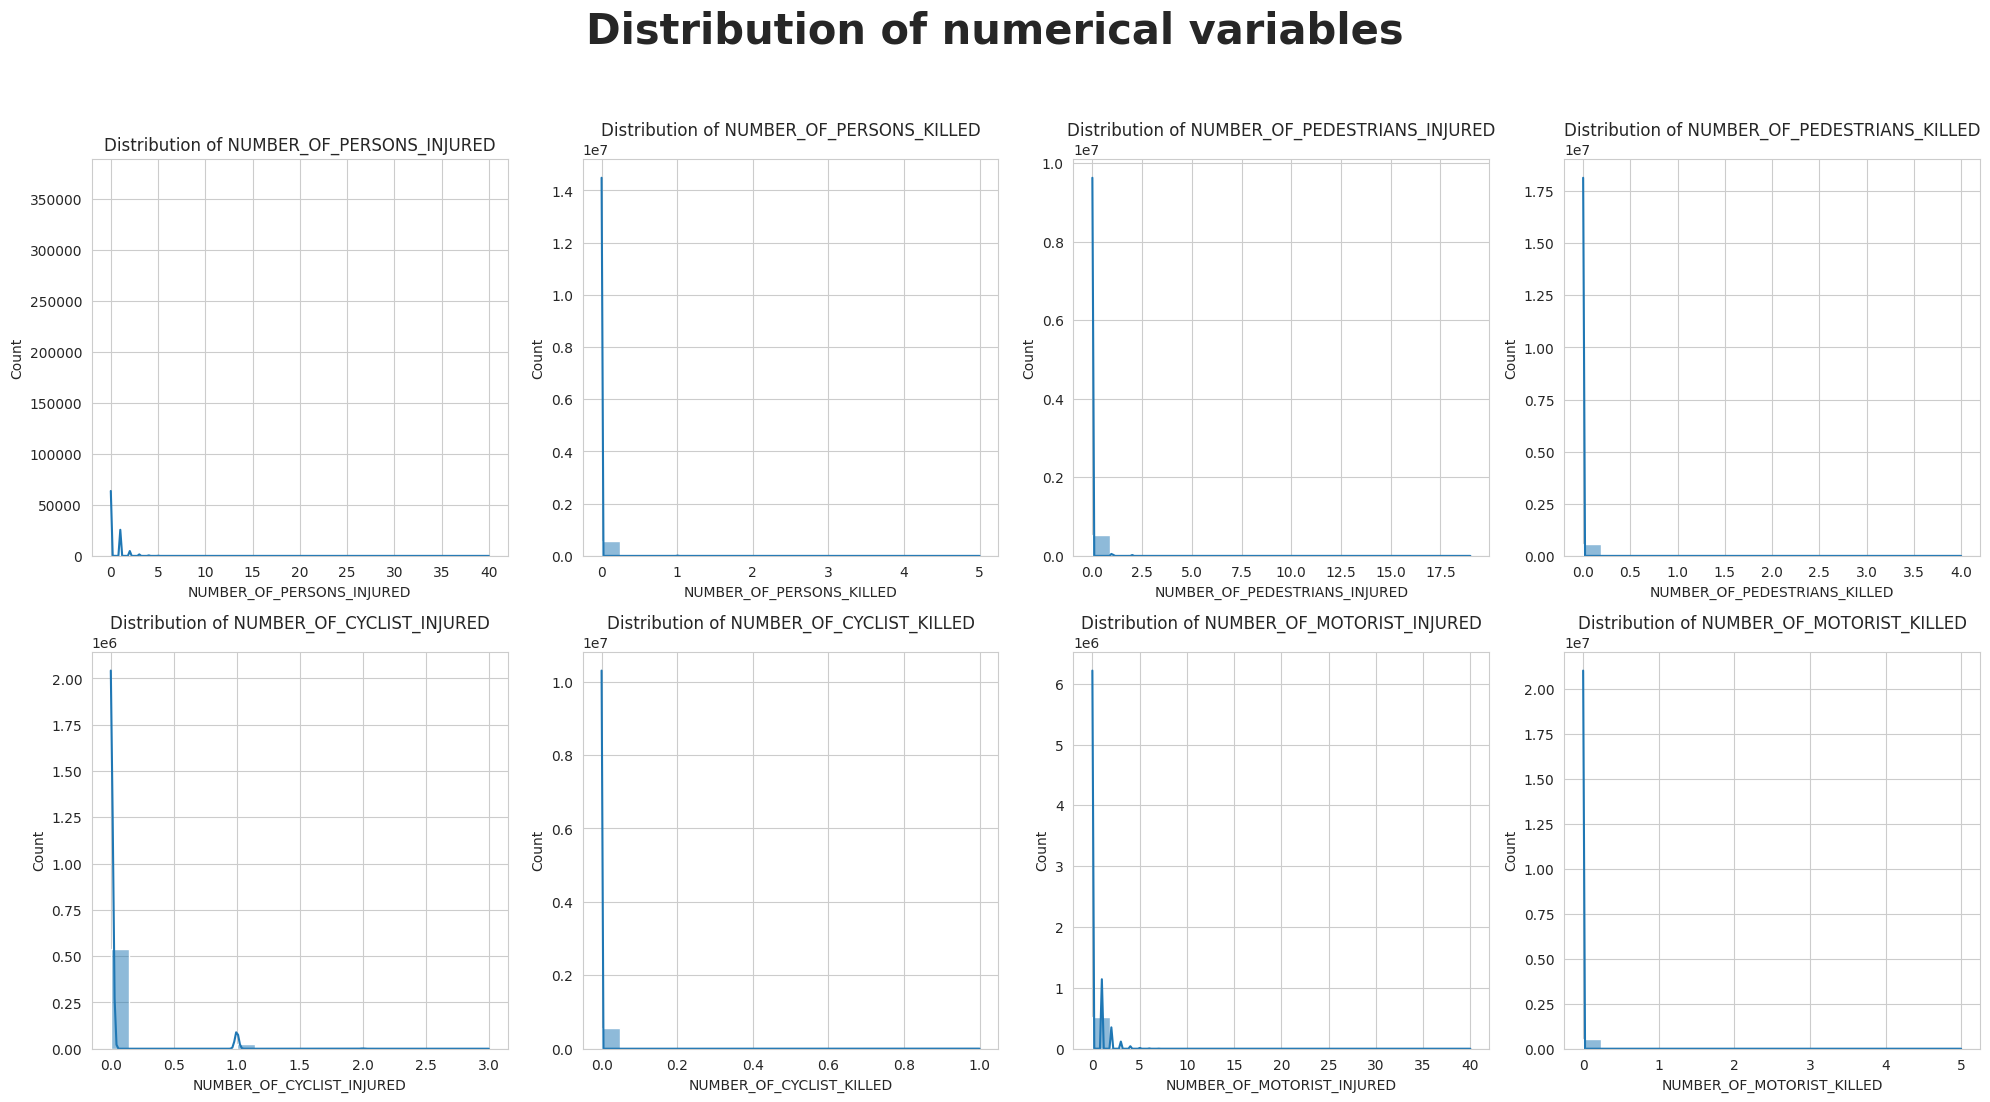

In [6]:

# Set up the subplot grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes_flat = axes.flatten()

# Plot histograms for each column
for i, column in enumerate(numeric_cols):
    if i >= len(axes_flat):
        break
    sns.histplot(data=df, x=column, ax=axes_flat[i], kde=True)
    axes_flat[i].set_title(f'Distribution of {column}', fontsize=12)
    axes_flat[i].tick_params(axis='x')

# Remove any leftover empty subplots
for j in range(i+1, len(axes_flat)):
    fig.delaxes(axes_flat[j])

fig.suptitle("Distribution of numerical variables", size=30,fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

**Overall Patterns:**

- Zero-inflated data: >99% zeros in fatalities; >80% in injuries
- Right-skewed: Rare severe events → Focus on outliers (multi-injury/fatal crashes).

Key Takeaway: Collisions are mostly non-injurious; severity hits motorists/pedestrians hardest.

### Disbribution of Categorical Values

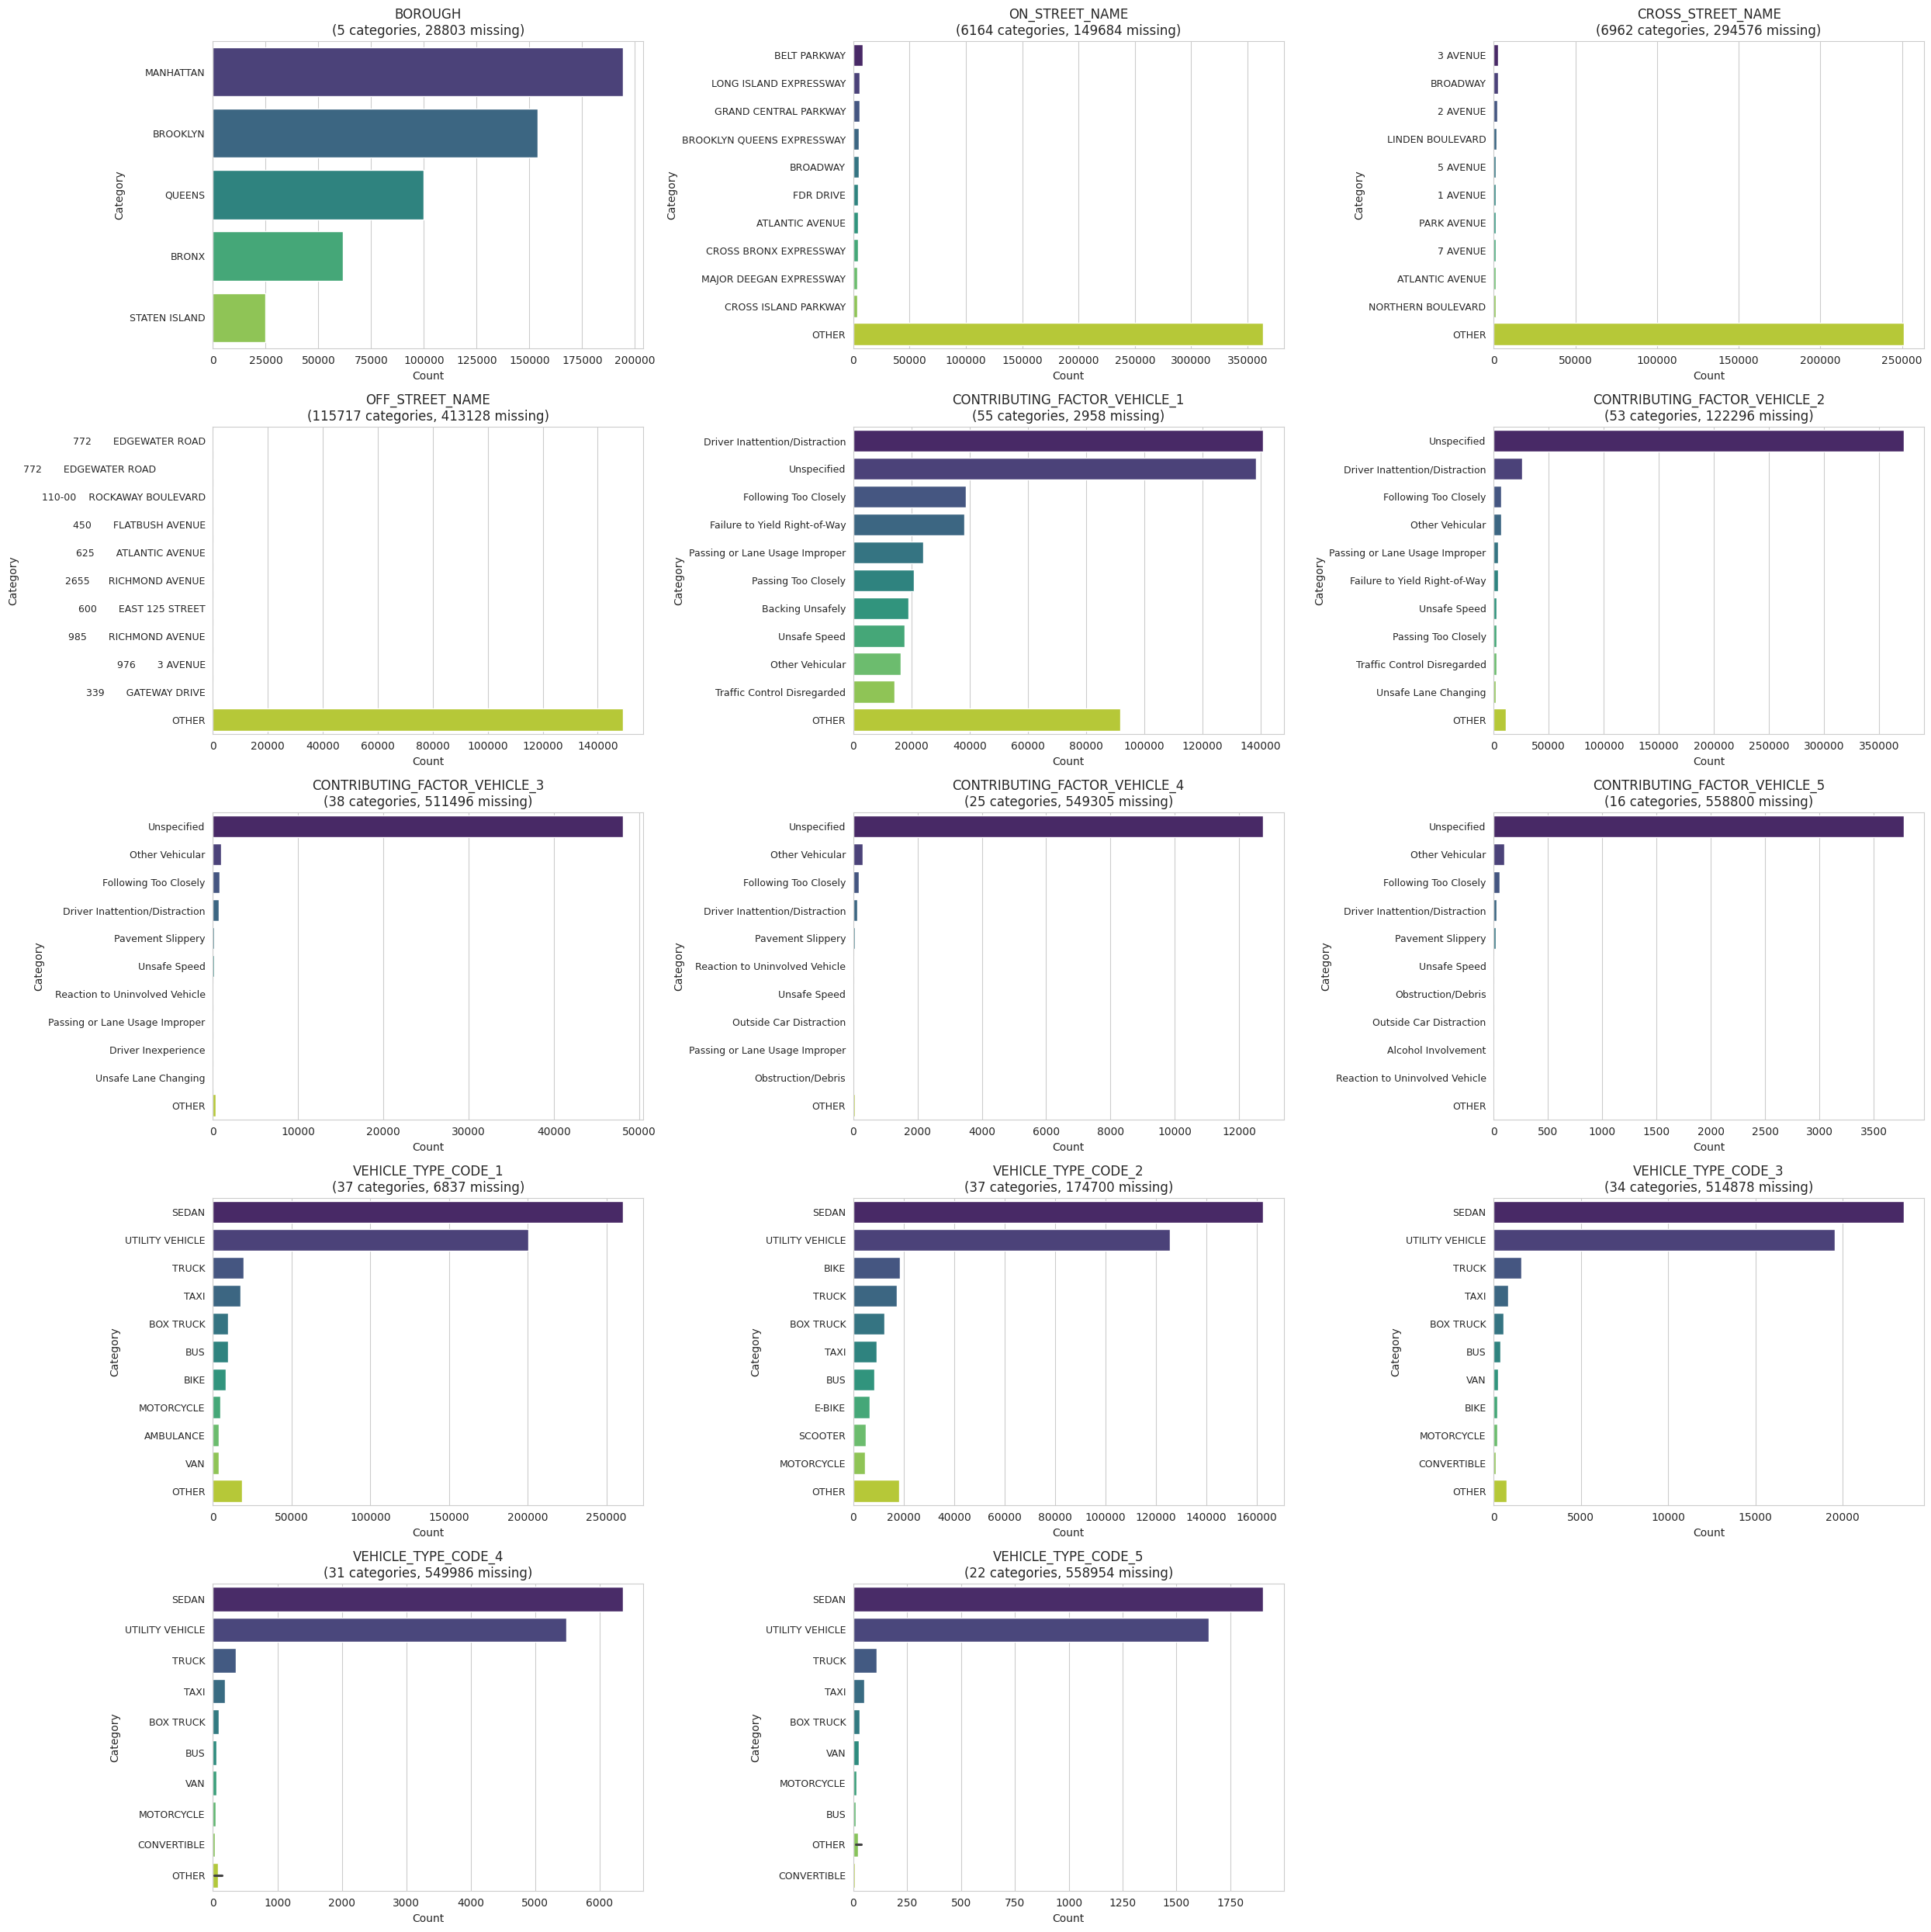

In [28]:
# Get categorical columns
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns
                   if col not in ['CRASH_DATE', 'CRASH_TIME', 'LOCATION']]

# Calculate grid size
num_categorical_cols = len(categorical_cols)
n_cols = 3
n_rows = (num_categorical_cols + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Get top 10 categories + other
    value_counts = df[col].value_counts(dropna=True)
    if len(value_counts) > 10:
        top_data = value_counts.head(10)
        other_count = value_counts.iloc[10:].sum()
        plot_data = top_data.reset_index()
        plot_data.loc[len(plot_data)] = ['OTHER', other_count]
    else:
        plot_data = value_counts.reset_index()

    plot_data.columns = ['Category', 'Count']

    # Plot with seaborn
    ax = axes[i]
    sns.barplot(data=plot_data, y='Category', x='Count', ax=ax,
                palette='viridis', hue='Category', legend=False)

    # Add title with stats
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    ax.set_title(f'{col}\n({n_unique} categories, {n_missing} missing)')
    ax.tick_params(axis='y', labelsize=9)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Pairplot of Injury and Fatality Counts

<Figure size 1000x600 with 0 Axes>

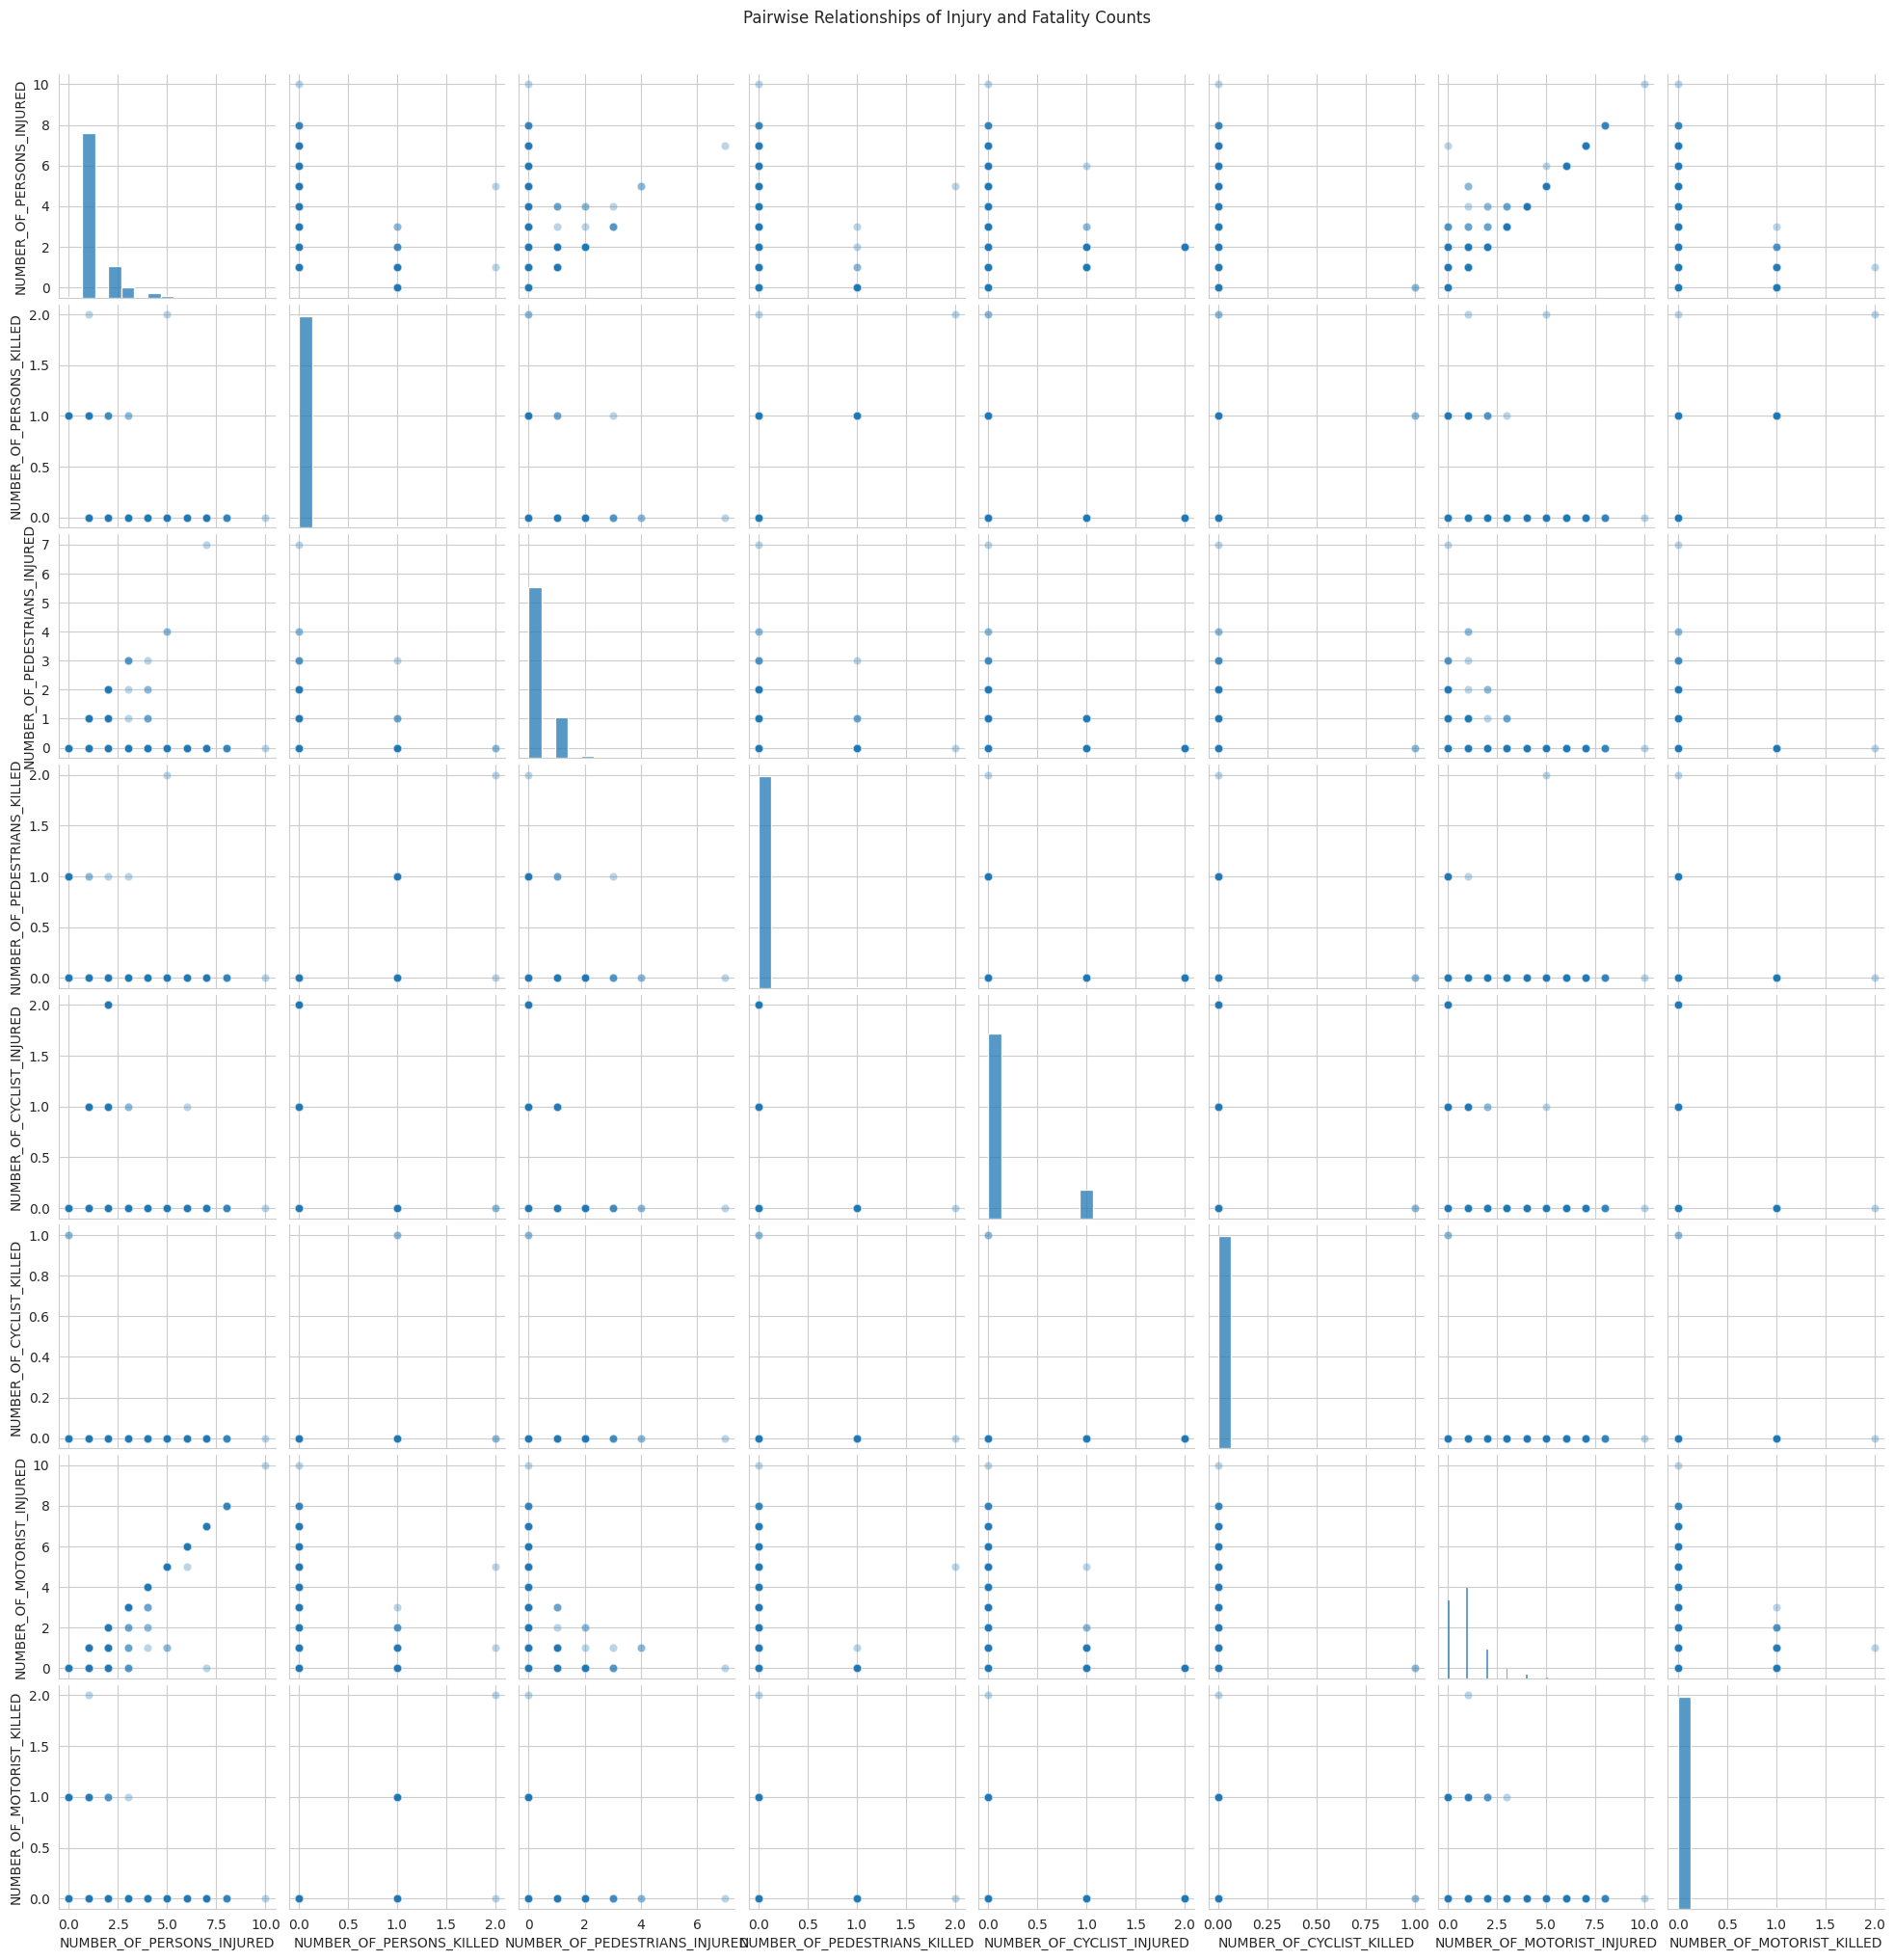

In [ ]:
# Select relevant numerical columns for the pairplot
# These are the injury and fatality counts that are already in integer format

pairplot_cols = [
    'NUMBER_OF_PERSONS_INJURED',
    'NUMBER_OF_PERSONS_KILLED',
    'NUMBER_OF_PEDESTRIANS_INJURED',
    'NUMBER_OF_PEDESTRIANS_KILLED',
    'NUMBER_OF_CYCLIST_INJURED',
    'NUMBER_OF_CYCLIST_KILLED',
    'NUMBER_OF_MOTORIST_INJURED',
    'NUMBER_OF_MOTORIST_KILLED'
]

# Create the pairplot
df_pairplot = df[pairplot_cols].copy()
df_pairplot = df_pairplot[(df_pairplot[pairplot_cols].sum(axis=1) > 0)] # Uncomment to filter zero-injury/fatality crashes

# For better visualization with many zeros, consider a smaller sample or adjusting alpha
if len(df_pairplot) > 10000: # Limit sample size for performance if dataset is very large
    df_pairplot = df_pairplot.sample(n=10000, random_state=42) # Adjust sample size as needed

# Create the pairplot
g = sns.pairplot(df_pairplot, diag_kind='hist', plot_kws={'alpha': 0.3})

plt.show()